In [146]:
import numpy as np
import csv

In [50]:
import matplotlib.pyplot as plt

In [51]:
%matplotlib inline

In [405]:
class LinearClassifier:
    def __init__(self, lrate=1.0):
        self.w = 0
        self.b = 0
        self.lrate = lrate
    
    def threshold(self, x):
        if x >= 0:
            return 1
        return 0
    
    def predict(self,X):
        return np.apply_along_axis(self.threshold,0,np.dot(np.mat(self.w), X.T) + self.b)
        
    def loss(self, X, y):
        return np.sum(np.abs(self.predict(X) - y))/len(X) + np.dot(self.w, self.w.T) + self.b**2
    
    def fit(self,X,y,n_iter=10000,plot=True):
        n_train = len(X)
        self.w = np.zeros(len(X[0]))
        self.b = 0
        time = 1
        finish = False
        idx = 0
        accuracy = []
        accuracy.append(1 - np.sum(np.abs(self.predict(X) - y))/len(X))
        loss_prev = self.loss(X,y)
        while not finish:
            rate = 10.0 * self.lrate/ 10**(time//100 + 1)
            condition = y[idx] - self.threshold(np.dot(self.w,X[idx]) + self.b)
            self.w = self.w + rate*condition*X[idx]
            self.b = self.b + rate*condition   
            time += 1
            idx = (idx + 1) % n_train
            if condition != 0:
                accuracy.append(1 - np.sum(np.abs(self.predict(X) - y))/len(X))
            
            if condition != 0 and time > 1000:
                finish = abs(loss_prev - self.loss(X,y)) < 1e-3*self.loss(X,y)
                loss_prev = self.loss(X,y)
            
            if time > n_iter:
                break
            
            #if len(accuracy) > 10:
            #    finish = np.sum(np.abs(np.array(accuracy[-10:]) - np.array(accuracy[-11:-1]))) < 1e-3
        if plot:
            plt.figure(figsize=(20,10))
            plt.plot(accuracy)
            plt.xlabel('Weight updates')
            plt.ylabel('Accuracy')
            plt.title('Performance')
    
    """def fit(self, X, y):
        X_ext = np.ones((len(X), len(X[0]) + 1))
        X_ext[:,:-1] = X
        learning_rate = 0.1
        self.w = np.zeros(len(X[0]) + 1)
        converged = False
        accuracy = []
        time = 1
        while not converged:
            print time
            for idx in range(len(X)):
                learning_rate = 1.0/ 10**(time//100 + 1)
                if y[idx] - self.threshold(np.dot(self.w,X_ext[idx])) != 0:
                    self.w = np.add(self.w, (y[idx] - self.threshold(np.dot(self.w,X_ext[idx]))) * learning_rate * X_ext[idx])
                    time += 1
                    accuracy.append(1 - np.sum(np.abs(np.apply_along_axis(self.threshold,0,np.dot(np.mat(self.w), X_ext.T)) - y))/len(X))
            
            if len(accuracy) > 10:
                converged = np.sum(np.abs(np.array(accuracy[-10:]) - np.array(accuracy[-11:-1]))) < 1e-3
            #general bound on number of iterations
            if time > 5000:
                break
                
        #print accuracy
        plt.plot(accuracy)"""

In [409]:
class LogisticRegression:
    def __init__(self, rate=1.0):
        self.w = 0
        self.b = 0
        self.lrate = rate
    
    def h(self, x):
        return 1.0/(1 + np.exp(-np.dot(self.w, x) - self.b))
    
    def threshold(self, x):
        if x >= 0:
            return 1
        return 0
    
    def loss(self, X, y):
        return np.sum(np.abs(self.predict(X) - y))/len(X) + np.dot(self.w, self.w.T) + self.b**2
    
    def predict(self,X):
        return np.apply_along_axis(self.threshold,0,np.dot(np.mat(self.w), X.T) + self.b)
    
    def fit(self, X, y, n_iter=10000, plot=True):
        n_train = len(X)
        self.w = np.zeros(len(X[0]))
        self.b = 0
        finish = False
        accuracy = []
        time = 1
        idx = 0
        loss_prev = self.loss(X,y)
        accuracy.append(1 - np.sum(np.abs(self.predict(X) - y))/len(X))
        while not finish:
            rate = 2 * self.lrate/ 2**(time//100 + 1)
            self.w = self.w + rate*(y[idx] - self.h(X[idx]))*self.h(X[idx])*(1 - self.h(X[idx]))*X[idx]
            self.b = self.b + rate*(y[idx] - self.h(X[idx]))*self.h(X[idx])*(1 - self.h(X[idx]))  
            time += 1
            #idx = (idx + 1) % n_train
            idx = random.randint(0, n_train-1)
            accuracy.append(1 - np.sum(np.abs(self.predict(X) - y))/len(X))
            
            if time > n_iter:
                break
            
                
        if plot:
            plt.figure(figsize=(20,10))
            plt.plot(accuracy)
            plt.xlabel('Weight updates')
            plt.ylabel('Accuracy')
            plt.title('Performance')
        

In [144]:
def read_datafile(name):
    #Technical function to read data from files.
    with open(name, 'rb') as csvfile:
        reader = csv.reader(csvfile, delimiter=' ')
        num = len(list(reader))
    with open(name, 'rb') as csvfile:
        reader = csv.reader(csvfile, delimiter=' ')
        data = np.zeros((num,124))
        idx = 0
        for row in reader:
            data[idx,0] = int(row[0])
            data[idx, [int(x.split(":")[0]) for x in row[1:-1]]] = 1
            idx += 1
    return data

In [163]:
data = read_datafile('adult_dataset/a7a.train')

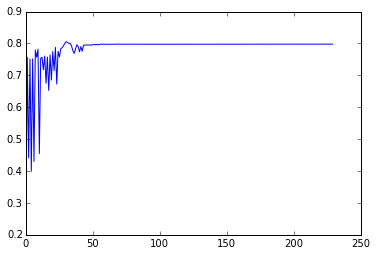

In [306]:
c = LinearClassifier()
c.fit(data[:,1:], (data[:,0] + 1)/2)

In [307]:
import random

In [317]:
random.randint(0,1)

1

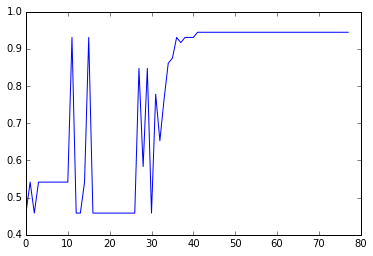

In [287]:
c = LinearClassifier()
c.fit(a[:,:2], a[:,2])

In [336]:
len(a) - sum(abs(c.predict(a[:,:2]) - a[:,2]))

68.0

In [245]:
len(data[:,1:][0])

123

In [240]:
len(c.w)

1

In [460]:
a = np.loadtxt('earthquake-noisy.data.txt', delimiter=',')

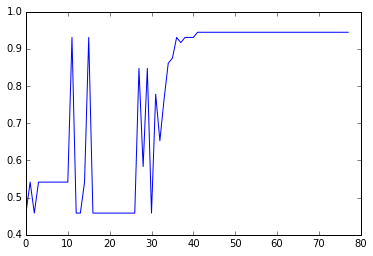

In [329]:
c = LinearClassifier()
c.fit(a[:,:2], a[:,2])

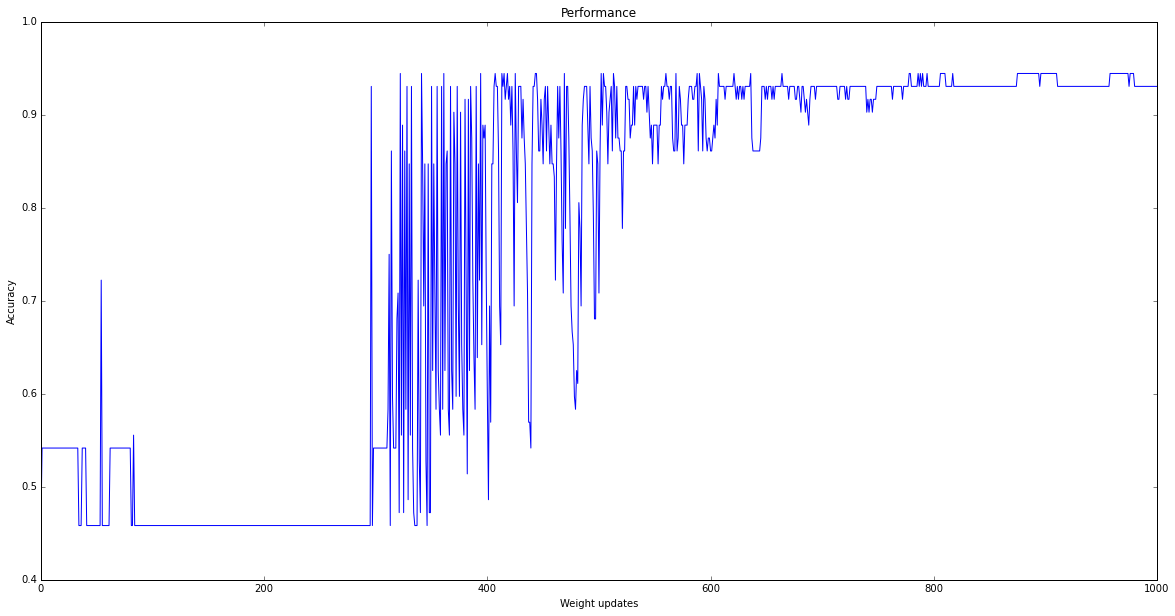

In [430]:
lr = LogisticRegression()
lr.fit(a[:,:2], a[:,2], 1000)

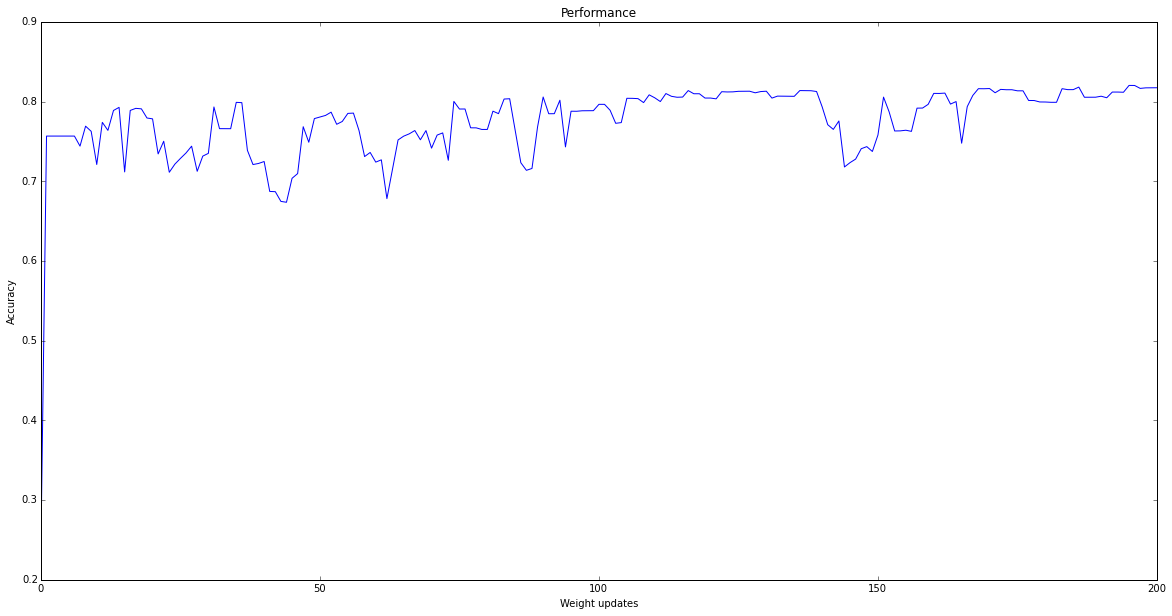

In [356]:
lr = LogisticRegression()
lr.fit(data[:,1:], (data[:,0] + 1)/2, 200)

In [373]:
def earthquakeExampleLC(name='earthquake-noisy.data.txt'):
    data = np.loadtxt(name, delimiter=',')
    n_train = round(len(data) * 0.8)
    c = LinearClassifier()
    random.shuffle(data)
    train = data[:n_train,:]
    test = data[n_train:,:]
    plt.scatter(train[:,0], train[:,1], c='r')
    plt.scatter(test[:,0], test[:,1], c='b')
    c.fit(train[:,:2], train[:,2])

    accuracy = (len(test) - sum(abs(c.predict(test[:,:2]) - test[:,2])))/len(test)

    print "accuracy: ", accuracy*100, "%"

In [443]:
def crossValidation(classifier, X, y, folds=1, other_args={}):
    c = classifier()
    fold_size = int(len(X)/folds)
    accuracy = []
    for k in range(folds):
        indexes = [x for x in range(len(X)) if x not in range(k*fold_size, (k+1)*fold_size)]
        c.fit(X[indexes], y[indexes], **other_args)
        accuracy.append((fold_size - sum(abs(c.predict(X[k*fold_size:(k+1)*fold_size]) - y[k*fold_size:(k+1)*fold_size])))/fold_size)
    print "accuracy: ", np.average(accuracy)*100, "%"

In [463]:
np.random.shuffle(a)

accuracy:  91.4285714286 %


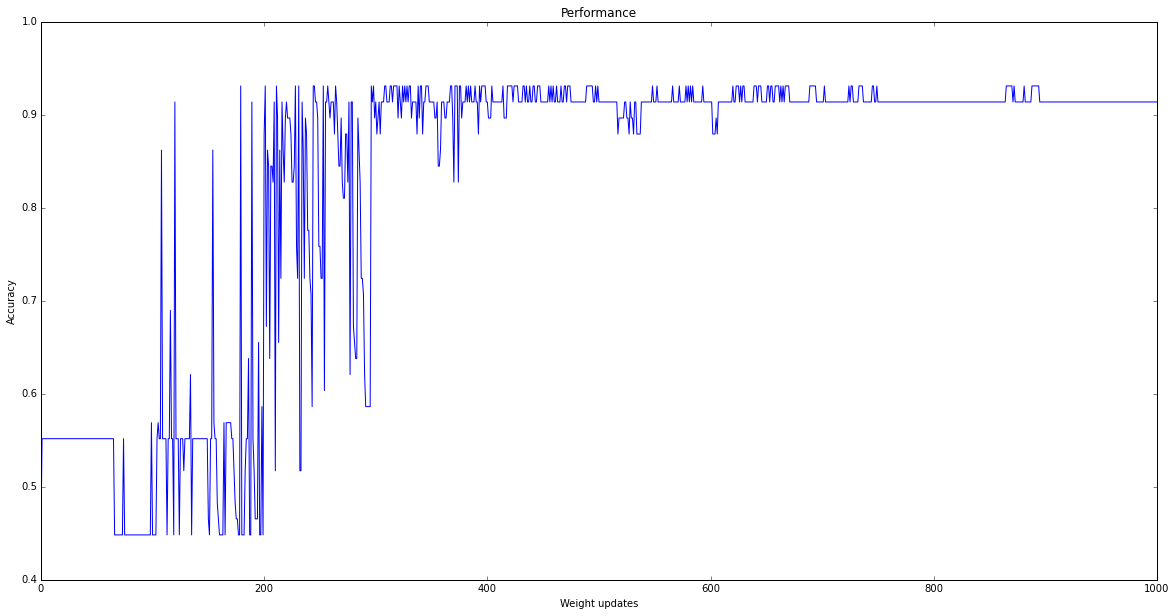

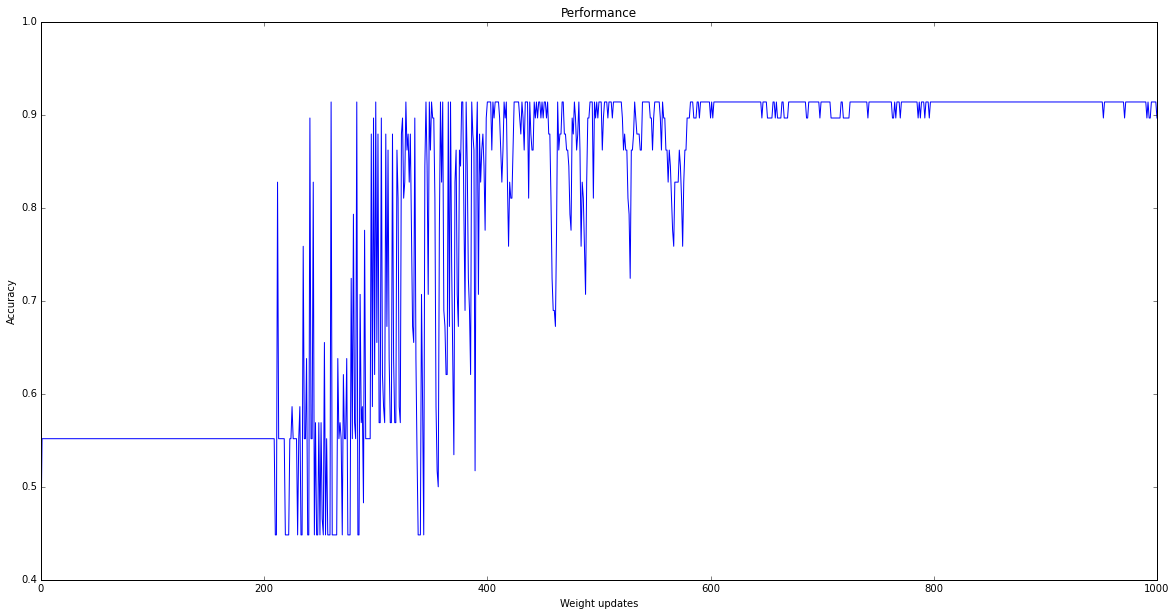

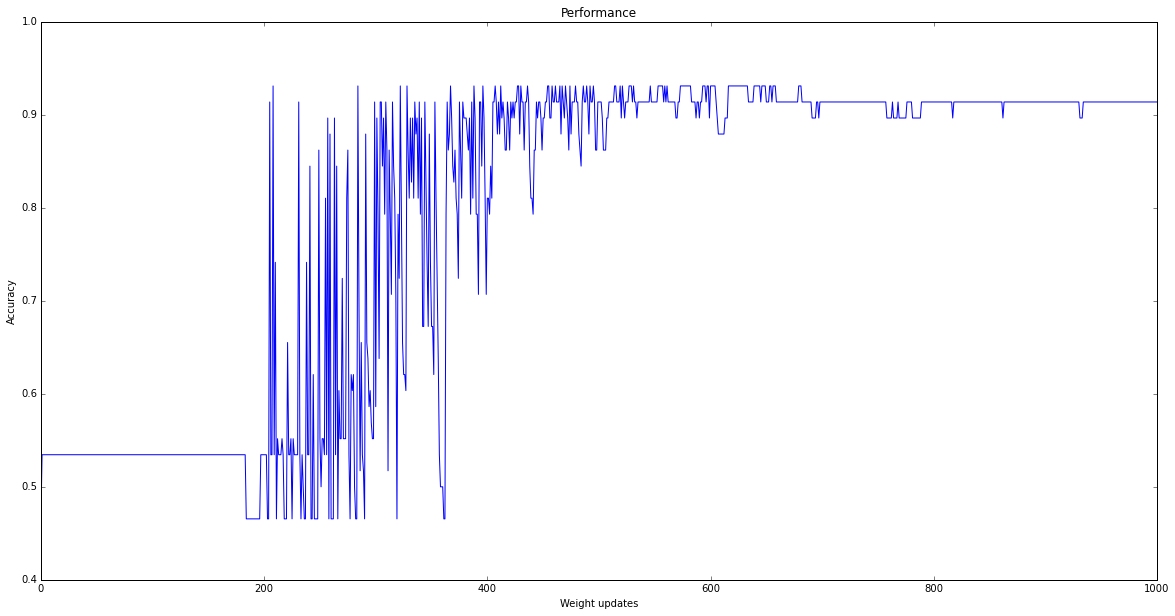

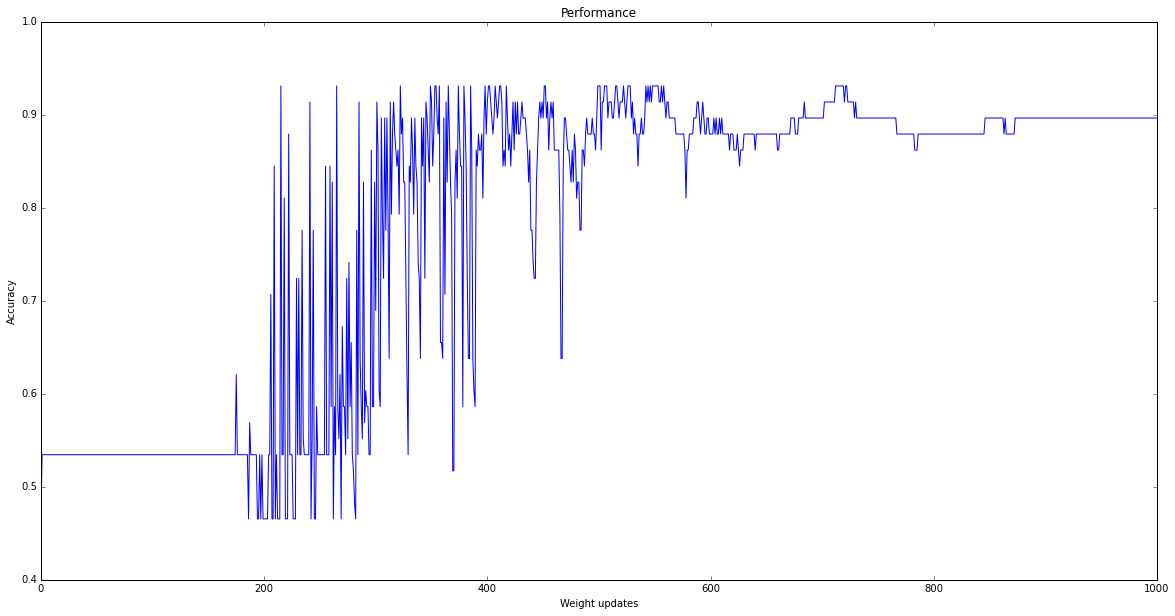

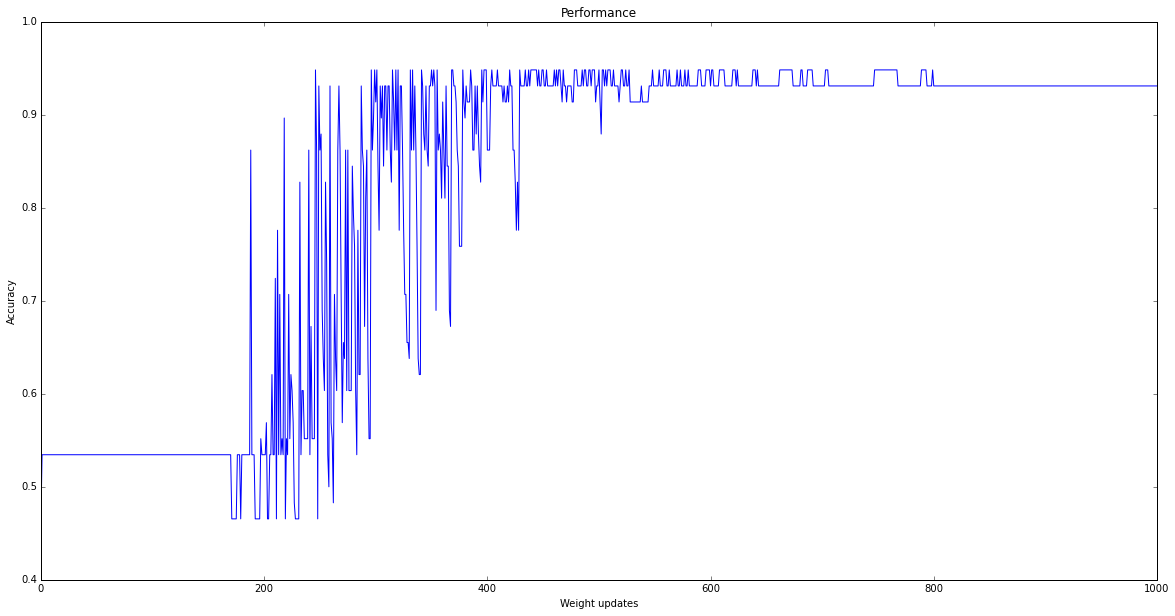

In [466]:
crossValidation(LogisticRegression, a[:,:2], a[:,2], folds=5, other_args={'n_iter':1000, 'plot':True})

In [464]:
a

array([[ 6.1,  6.6,  0. ],
       [ 5.4,  4.7,  0. ],
       [ 5.6,  5.1,  0. ],
       [ 5.9,  3.8,  1. ],
       [ 6.1,  4.9,  1. ],
       [ 6.1,  4.4,  1. ],
       [ 5.9,  4.7,  1. ],
       [ 5.3,  3.8,  0. ],
       [ 6.2,  4.4,  1. ],
       [ 5.2,  3.4,  1. ],
       [ 6.3,  6.6,  0. ],
       [ 5.5,  5.7,  0. ],
       [ 5.4,  4.2,  1. ],
       [ 5.9,  5.8,  0. ],
       [ 6. ,  5.5,  0. ],
       [ 5.5,  5.6,  0. ],
       [ 5.8,  5.6,  0. ],
       [ 6. ,  4.3,  1. ],
       [ 5.3,  4.4,  0. ],
       [ 5.5,  3.9,  1. ],
       [ 6. ,  4.8,  1. ],
       [ 5.8,  4.3,  1. ],
       [ 5.8,  4.6,  1. ],
       [ 6. ,  6.7,  0. ],
       [ 5.7,  5.8,  0. ],
       [ 6.1,  4.6,  1. ],
       [ 5.7,  6. ,  0. ],
       [ 5.9,  4.3,  1. ],
       [ 5.7,  5.6,  0. ],
       [ 6.4,  5.8,  1. ],
       [ 5.9,  4.7,  1. ],
       [ 4.8,  4.5,  0. ],
       [ 5. ,  5.9,  0. ],
       [ 6.1,  4.6,  1. ],
       [ 6.1,  6. ,  0. ],
       [ 6.1,  4.5,  1. ],
       [ 6.1,  6.9,  0. ],
 

accuracy:  92.8571428571 %


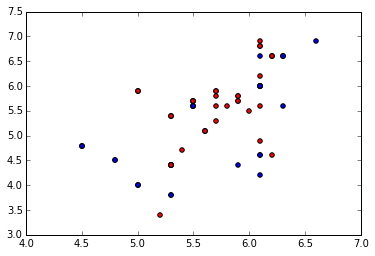

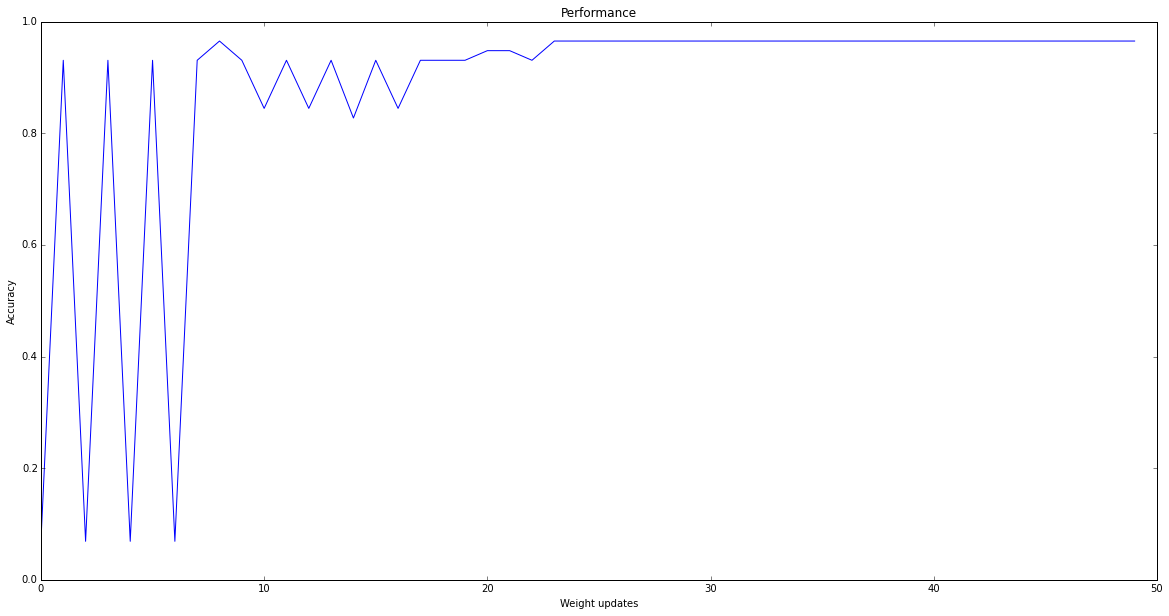

In [374]:
earthquakeExampleLC()

In [381]:
a[range(10)+[11],1]

array([ 4.4,  6.6,  6.2,  5.9,  5.7,  4.8,  4.7,  5.6,  4.1,  6. ,  6.6])

In [396]:
np.average([1,2,4])

2.3333333333333335

In [393]:
import math

In [398]:
int(4.9)

4

In [469]:
data

array([[-1.,  0.,  0., ...,  0.,  0.,  0.],
       [-1.,  0.,  0., ...,  0.,  0.,  0.],
       [-1.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [-1.,  0.,  1., ...,  0.,  0.,  0.],
       [-1.,  0.,  0., ...,  0.,  0.,  0.],
       [-1.,  0.,  0., ...,  0.,  0.,  0.]])

In [468]:
np.random.shuffle(data)